In [241]:
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(21)

### 1. How likely is it that you roll doubles when rolling two dice?

In [31]:
n1_trials = n1_rows = 10**5
n1_dice = n1_cols = 2

rolls1 = np.random.choice([1,2,3,4,5,6], n1_trials * n1_dice).reshape(n1_rows,n1_cols)

doubles_count = pd.DataFrame(rolls1).apply(lambda row: row[0] == row[1], axis = 1).sum()

prob_of_doubles = doubles_count / n1_rows
prob_of_doubles

0.16668

ANS: The probability is 16.67% (1 in 6)

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [41]:
n2_trials = n2_rows = 10**5
n2_coins = n2_cols = 8

#Will set up the binary options as heads = 1, tails = 0
flips2 = np.random.choice([0,1],n2_trials * n2_coins).reshape(n2_rows,n2_cols)

sums_of_flips = flips2.sum(axis=1)

exactly_3_heads = (sums_of_flips == 3).sum()
exactly_3_heads/n2_rows

0.21913

You will get exactly 3 heads 21.9% of the time.

In [40]:
more_than_3_heads = (sums_of_flips > 3).sum() 
more_than_3_heads/n2_rows

0.63598

You will get more than 3 heads 63.6% of the time.

### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [55]:
n3_trials = n3_rows = 10**5
n3_boards = n3_cols = 2

#Assuming all cohorts are the same size:
p_ds = .25

n3_data = np.random.random((n3_rows, n3_cols))
n3_results = ((n3_data < p_ds).sum(axis = 1)) == 2
n3_results.sum()/n3_rows

0.06235

The odds of passing two data science alum billboards is 6.24%.

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [203]:
n4_trials = n4_rows = 10**5
# columns = 5, for 5 days from Monday to Friday.
#Assume they load first thing Monday morning, the draw is the last draw of the week before restock the following Monday, and that it is always stocked to 17.

poptarts = np.random.normal(3,1.5,(n4_rows,5))
still_tartin = (poptarts.sum(axis=1) < 17).sum()
still_tartin/n4_rows


0.72548

You will be able to pop that tart on 72.2% of Friday afternoons.

### 5. Men have an average height of 178 cm and standard deviation of 8cm. Women have a mean of 170, sd = 6cm. Since you have means and standard deviations, you can use np.random.normal to generate observations.  If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [77]:
n5_trials = n5_rows = 10**5

tallness = np.random.normal([178,170],[8,6],(n5_rows,2))

women_taller = pd.DataFrame(tallness).apply(lambda row: row[0] < row[1], axis = 1).sum()
women_taller/n5_rows

0.21146

They are likely taller 21% of the time.

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 

In [80]:
curruption = 1/250

#### (6a) What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [98]:
(np.random.random(50) < curruption).sum()

0

In [104]:
(np.random.random(100) < curruption).sum()

0

In [105]:
(np.random.random(100000) < curruption).sum()

405

I ran this many times.  50 students never showed curruption, and every 8 or 10 runs of the 100 would pop a single curruption.  Running it with 100k to get a decent probability came to 405, or 0.4%.

#### (6b) What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [113]:
random_150 = (np.random.random(150) < curruption).sum()

0.0

In [253]:
# wasn't satisfied so I simulated the simulation 100k times to see how many produced a curruption:
thing = []
for i in range(100000):
    if ((np.random.random(50) < curruption).sum()) > 0:
        thing.append(1)
result7b = len(thing)/100000
result7b


0.18093

This is the way to do these problems.

#### (6c) How likely is it that 450 students all download anaconda without an issue?

In [148]:
random_450 = (np.random.random(450) < curruption).sum()
random_450

thing2 = []
for i in range(100000):
    if ((np.random.random(450) < curruption).sum()) > 0:
        thing2.append(1)
1-(len(thing)/100000)

0.5511699999999999

55.1%

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [162]:
n7_trials = n7_rows = 10**5
n7_days = n7_cols = 3
p_foodtruck = .7

((np.random.random((n7_rows,n7_cols)) > p_foodtruck).sum(axis=1) == 3).sum()/n7_rows

0.02662

2.67% chance it's not there three days in a row.
#### (7b) How likely is it that a food truck will show up sometime this week?

In [164]:
n7_days_b = n7_cols_b = 7

((np.random.random((n7_rows,n7_cols_b)) < p_foodtruck).sum(axis=1) > 1).sum()/n7_rows

0.99625

99.6% chance it will show up

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [252]:
n8_rooms = n8_rows = 10**5
n8_room = n8_cols = 23
p_birthday = 1/365

((np.random.random((n8_rows,n8_cols)) < p_birthday).sum(axis = 1) > 1).sum()/n8_rows

0.00189

In [264]:
birthdays = np.random.choice(range(365), (n8_rows * n8_cols)).reshape(n8_rows,n8_cols)
birthdays = pd.DataFrame(birthdays)
birthdays = birthdays.nunique(axis=1) != n8_cols
birthdays.sum()/n8_rows

0.50437

In [265]:
n8_cols = 20
birthdays = np.random.choice(range(365), (n8_rows * n8_cols)).reshape(n8_rows,n8_cols)
birthdays = pd.DataFrame(birthdays)
birthdays = birthdays.nunique(axis=1) != n8_cols
birthdays.sum()/n8_rows

0.41295

In [266]:
n8_cols = 40
birthdays = np.random.choice(range(365), (n8_rows * n8_cols)).reshape(n8_rows,n8_cols)
birthdays = pd.DataFrame(birthdays)
birthdays = birthdays.nunique(axis=1) != n8_cols
birthdays.sum()/n8_rows

0.89141

23 people = 1.93%, 20 people = 1.84%, 40 people = 2.07%

### Bonus: Mage Duel

In [180]:
#my wizard = 6d4
wiz_rolls = [1,2,3,4]
wiz_dice = 6
#their mage = 4d6
mage_rolls = [1,2,3,4,5,6]
mage_dice = 4

#prediction - wizard expected value = 6*2.5=15; mage = 4*3.5=14 - expect wizard to win 15/29 times

duels = 10
wiz_wins = 0
mage_wins = 0
for i in range(duels):
    if (np.random.choice(wiz_rolls,wiz_dice).sum() > np.random.choice(mage_rolls,mage_dice).sum()):
        wiz_wins += 1
    else:
        mage_wins += 1
wiz_wins,mage_wins

(4, 6)

Running 10 duels usually results in 5,5

In [193]:
duels = 100000
wiz_wins = 0
mage_wins = 0
for i in range(duels):
    if (np.random.choice(wiz_rolls,wiz_dice).sum() > np.random.choice(mage_rolls,mage_dice).sum()):
        wiz_wins += 1
    else:
        mage_wins += 1
wiz_wins,mage_wins

(54189, 45811)

In [194]:
wiz_wins/(wiz_wins + mage_wins)

0.54189

In [195]:
# Comapring to what I *think* is the theoretical max:
15/29

0.5172413793103449

### Bonus: Chuck-a-Luck

In [242]:
# Variable: Select a number between 1 and 6:
num_pick = np.random.choice([1,2,3,4,5,6])

# -$1 outcome: no matches
# $0 outcome: 1 match
# $1 outcome: 2 matches
# $3 outcome: 3 matches

#I want to create the model then test it to see that all numbers have the same odds when run a bunch of times.

chuck_trials = chuck_rows = 10**6
chuck_dice = chuck_cols = 3

chuck_results = np.random.choice([1,2,3,4,5,6], chuck_rows * chuck_cols).reshape(chuck_rows,chuck_cols)
chuck_results

match_result = (chuck_results == num_pick).sum(axis=1)

three_matches = (match_result == 3).sum()
two_matches = (match_result == 2).sum()
one_match = (match_result == 1).sum()
no_match = (match_result == 0).sum()

print(f'All three matches happen {100 * three_matches/chuck_rows}% of rolls; two matches {100 * two_matches/chuck_rows}%; one match {100 * one_match/chuck_rows}%; and no matches {100 * no_match/chuck_rows}%')


All three matches happen 0.4707% of rolls; two matches 6.9488%; one match 34.6679%; and no matches 57.9126%


In [243]:
# for i in len(match_result):
#     if match_result[i] == 3:
#         three_matches += 1
#     elif match_result[i] == 2:
#         two_matches += 1
#     elif match_result[i] == 1:
#         one_match += 1
#     else:
#         no_match += 1

total_income = (three_matches * 3) + (two_matches * 2) + (one_match) - chuck_rows
total_income

-500224

In [247]:
import matplotlib.pyplot as plt

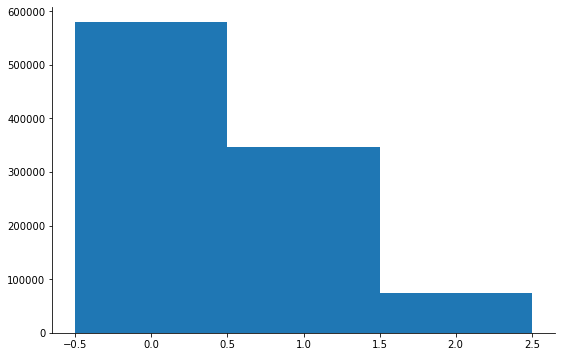

In [270]:
plt.hist(match_result, bins=[ 0, 1, 2, 3], align = 'left')
plt.show()